
# TensorFlow教程复习

- toc: true
- branch: master
- badges: true
- use_math: true
- comments: true
- categories: [jupyter,tensorflow]
- description: 复习一遍TensorFlow入门教程
---


将分tf2.0与tf1.0两大章节，分别重现TensorFlow教程中的关键章节。

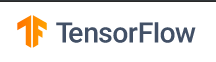

# TensorFlow2.0复习

## keras机器学习基本知识
### 图像分类

该教程训练一个神经网络用于对衣物图像进行分类，如将鞋与衬衫分开。该教程使用`tf.keras`包，它是TF上构建和训练模型的高级API.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'